In [2]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [3]:
%matplotlib inline

In [4]:
open('USW00014922.dly','r').readlines()[:10]

['USW00014922193804TMAX-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     106  0  189  0  172  0  217  0  256  0  194  0  117  0  133  0  228  0  217  0  172  0  144  0   89  0  144  0   94  0  111  0  156  0  267  0  256  0  156  0  144  0  222  0-9999   \n',
 'USW00014922193804TMIN-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     -17  0   11  0   61  0   28  0   78  0   78  0   72  0  106  0  106  0   72  0   11  0   -6  0   17  0   -6  0   39  0   56  0   44  0  117  0  156  0   39  0   17  0   44  0-9999   \n',
 'USW00014922193804PRCP-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       0  0    0  0    0  0    0  0    0  0  267  0   64  0  193  0   58  0    0  0    0T 0    3  0   25  0    0  0  119  0   10  0    0T 0    0  0   36  0   56  0    0  0    0  0-9999   \n',
 'USW00014922193804SNOW-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [5]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [6]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [7]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [8]:
minneapolis = parsefile('USW00014922.dly')

In [9]:
minneapolis

array([(1938, 4, 'TMAX', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 106,   189,   172,   217,   256,   194,   117,   133,   228,   217,   172,   144,    89,   144,  94,   111,   156,   267,   256,   156,   144,   222, -9999),
       (1938, 4, 'TMIN', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -17,    11,    61,    28,    78,    78,    72,   106,   106,    72,    11,    -6,    17,    -6,  39,    56,    44,   117,   156,    39,    17,    44, -9999),
       (1938, 4, 'PRCP', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,   0,     0,     0,     0,     0,   267,    64,   193,    58,     0,     0,     3,    25,     0, 119,    10,     0,     0,    36,    56,     0,     0, -9999),
       ...,
       (2015, 9, 'WT01',     1,     1,     1,     1,     1,     1, -9999,     1,   1,     1, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999, -9999, -9999, -9999,     1,   1,     1,     1,     1, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT03', -9999, 

In [10]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [11]:
unroll(minneapolis[0])

array([('1938-04-01', -999.9), ('1938-04-02', -999.9),
       ('1938-04-03', -999.9), ('1938-04-04', -999.9),
       ('1938-04-05', -999.9), ('1938-04-06', -999.9),
       ('1938-04-07', -999.9), ('1938-04-08', -999.9),
       ('1938-04-09',   10.6), ('1938-04-10',   18.9),
       ('1938-04-11',   17.2), ('1938-04-12',   21.7),
       ('1938-04-13',   25.6), ('1938-04-14',   19.4),
       ('1938-04-15',   11.7), ('1938-04-16',   13.3),
       ('1938-04-17',   22.8), ('1938-04-18',   21.7),
       ('1938-04-19',   17.2), ('1938-04-20',   14.4),
       ('1938-04-21',    8.9), ('1938-04-22',   14.4),
       ('1938-04-23',    9.4), ('1938-04-24',   11.1),
       ('1938-04-25',   15.6), ('1938-04-26',   26.7),
       ('1938-04-27',   25.6), ('1938-04-28',   15.6),
       ('1938-04-29',   14.4), ('1938-04-30',   22.2)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [12]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [13]:
minneapolis_tmax = getobs('USW00014922.dly','TMAX')

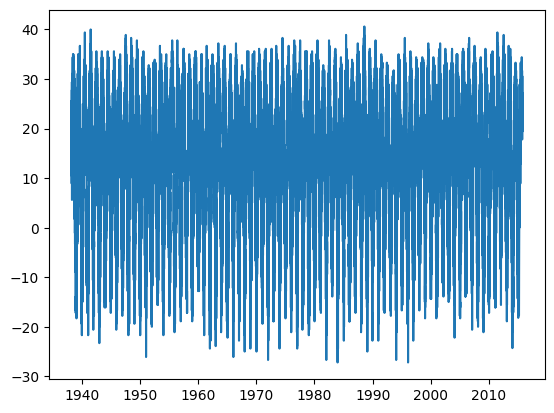

In [14]:
pp.plot(minneapolis_tmax['date'],minneapolis_tmax['value'])

In [15]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [16]:
fillnans(minneapolis_tmax)

In [17]:
np.mean(minneapolis_tmax['value'])

12.74308121666019

In [18]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [19]:
selectyear(minneapolis_tmax,1947)

array([ -9.4, -12.2, -16.7,  -6.1,  -5. ,   0.6,   1.7,   1.7,  -1.7,
         4.4,   2.8,  -5. ,   3.9,   3.3, -10.6,  -2.2,   5.6,   7.2,
         8.3,   1.7, -14.4,  -1.1,   8.3,   7.2,   6.7,   9.4,   4.4,
        -3.9,  -3.9,  -5.6,  -3.9,  -8.9,  -3.3,  -1.1, -14.4, -13.3,
       -10. , -12.2, -11.1,  -8.3,  -3.9,   2.8,   2.8,   7.8,   2.2,
         1.1,   0. ,   2.2, -12.2,  -5. ,  -7.2,  -7.8,  -7.2,  -7.2,
        -3.9,  -3.3,  -5.6,  -6.7,  -3.9,  -3.9,  -3.3,  -2.8,  -1.7,
         1.1,   2.8,   2.8,   2.2,   3.3,   3.9,   3.3,   3.3,   1.7,
        -5. ,  -2.2,  -0.6,   1.7,   5.6,   3.9,   1.7,   2.2,  14.4,
        13.3,   5.6,  -3.3,   1.1,   5. ,   5. ,   2.2,   1.1,   5. ,
         3.9,  12.2,   6.7,   6.1,   7.2,   2.2,   6.7,   3.3,   5.6,
         6.7,   3.9,   6.7,  12.2,   7.2,   7.2,   9.4,   6.7,   7.2,
        10. ,  14.4,  10. ,   7.8,   7.8,  11.1,  11.7,  21.1,  12.8,
        23.9,  20.6,  27.2,  11.7,  18.3,  23.3,  13.9,  13.3,  10.6,
        10.6,  10. ,